In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import gc
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [0]:
ratings = pd.read_csv('/content/drive/My Drive/DS Project 20M/ratings.csv')

In [5]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [0]:
movies = pd.read_csv('/content/drive/My Drive/DS Project 20M/movies.csv')

In [0]:
total=ratings.merge(movies,on='movieId',how='inner')
total['genres']=total['genres'].apply(lambda x: x.split('|'))

In [0]:
gc.collect()

0

In [0]:
total

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
1,3,296,5.0,1439474476,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
2,4,296,4.0,1573938898,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
3,5,296,4.0,830786155,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
4,7,296,4.0,835444730,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
...,...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),[(no genres listed)]
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),"[Action, Adventure, Thriller]"
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),[Comedy]
25000093,162386,200726,4.0,1554651417,The Graduates (1995),"[Children, Drama]"


In [0]:
test=pd.DataFrame(total.groupby(['userId']).agg(movie_count=pd.NamedAgg(column='movieId', aggfunc='count')))

In [0]:
test = test.sort_values('movie_count',ascending=False)

In [0]:
test.describe()

,movie_count
count,162541.000000
mean,153.807932
std,268.047590
min,20.000000
25%,36.000000
50%,71.000000
75%,162.000000
max,32202.000000


In [0]:
test = test[test['movie_count'] > 200]

In [0]:
test = test.reset_index()

In [0]:
test

,userId,movie_count
0,72315,32202
1,80974,9178
2,137293,8913
3,33844,7919
4,20055,7488
...,...,...
32843,156456,201
32844,115756,201
32845,6761,201
32846,68693,201


In [0]:
total=total.merge(test,on='userId',how='inner')

In [0]:
total.drop(columns = ['movie_count'], inplace = True)

In [0]:
total

,userId,movieId,rating,timestamp,title,genres
0,3,296,5.0,1439474476,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
1,3,1217,5.0,1439474455,Ran (1985),"[Drama, War]"
2,3,1653,5.0,1439474631,Gattaca (1997),"[Drama, Sci-Fi, Thriller]"
3,3,4308,3.0,1439472792,Moulin Rouge (2001),"[Drama, Musical, Romance]"
4,3,5952,4.0,1439472616,"Lord of the Rings: The Two Towers, The (2002)","[Adventure, Fantasy]"
...,...,...,...,...,...,...
16063553,115410,140349,2.5,1453051430,Gabriel Iglesias: I'm Not Fat... I'm Fluffy (2...,[Comedy]
16063554,115410,133205,5.0,1453051977,Doug Stanhope: Beer Hall Putsch (2013),[Comedy]
16063555,115410,89584,3.0,1453051529,Skeletons (2010),"[Comedy, Fantasy]"
16063556,115410,165155,5.0,1484935807,Russell Peters: Almost Famous (2016),[Comedy]


In [0]:
total.describe()['timestamp']['75%']

1455488882.0

In [0]:
temp = total[['userId','movieId','timestamp']]

In [0]:
temp1 = temp.copy()

In [0]:
temp1

,userId,movieId,timestamp
0,3,296,1439474476
1,3,1217,1439474455
2,3,1653,1439474631
3,3,4308,1439472792
4,3,5952,1439472616
...,...,...,...
16063553,115410,140349,1453051430
16063554,115410,133205,1453051977
16063555,115410,89584,1453051529
16063556,115410,165155,1484935807


In [0]:
temp1['class'] = temp1['timestamp'].apply(lambda x: 1 if x < 1455488882.0 else 2)

In [0]:
temp1

,userId,movieId,timestamp,class
0,3,296,1439474476,1
1,3,1217,1439474455,1
2,3,1653,1439474631,1
3,3,4308,1439472792,1
4,3,5952,1439472616,1
...,...,...,...,...
16063553,115410,140349,1453051430,1
16063554,115410,133205,1453051977,1
16063555,115410,89584,1453051529,1
16063556,115410,165155,1484935807,2


In [0]:
del ratings

In [11]:
gc.collect()

14

In [0]:
temp1 = temp1.groupby(['userId','class'])['movieId'].count()

In [0]:
temp1

userId  class
3       1        428
        2        228
4       2        242
12      1        736
13      1        412
                ... 
162521  2         16
162524  1        229
162529  1        382
162533  1        367
162534  2        487
Name: movieId, Length: 37023, dtype: int64

In [0]:
temp1 = temp1.reset_index(level=[1])

In [0]:
temp1 = temp1.groupby(level = 0).count()

In [0]:
active_users = temp1[temp1['class'] == 2].index.tolist()

In [0]:
total = total[total.userId.isin(active_users)]

In [0]:
movie_ids = total['movieId'].unique().tolist()

In [0]:
del test,temp1
gc.collect()

0

In [0]:
gc.collect()

0

## **User Movie Matrix**

In [0]:
len(movie_ids)

51661

In [0]:
len(active_users)

4175

In [0]:
temp1 = total[['userId', 'movieId', 'rating']]

In [0]:
temp2 = pd.DataFrame(movie_ids, columns = ['movieId'])

In [0]:
temp2 = temp2.set_index('movieId')

In [0]:
dff = pd.DataFrame()

In [0]:
count = 1679
for user in active_users:
  print(count)
  count += 1
  temp3 = temp1[temp1['userId'] == user]
  xd = temp3.join(temp2,on = 'movieId', how='outer', sort=True)
  xd['userId'] = xd['userId'].fillna(float(user))
  xd['rating'] = xd['rating'].fillna(0.0)
  dff = pd.concat([dff, xd])

In [0]:
dff.to_csv('/content/drive/My Drive/DS Project 20M/user_movie_3.csv', index = False)

In [0]:
active_users = pd.read_csv('/content/drive/My Drive/DS Project 20M/ActiveUsers.csv')

In [0]:
active_users

In [0]:
xyz = pd.concat([active_users, pd.DataFrame(y_hc)], axis = 1)
xy = xyz.iloc[:, :].values

In [0]:
xyz = xyz.rename(columns = {0: 'Cluster'})

In [0]:
user_movie = pd.merge(active_users, ratings, left_on = 'userId', right_on = 'userId')

In [0]:
movie_matrix = user_movie.pivot_table(index='userId',columns='movieId',values='rating')

In [0]:
movie_matrix = movie_matrix.fillna(0.0)

In [0]:
X = movie_matrix.iloc[:, :].values

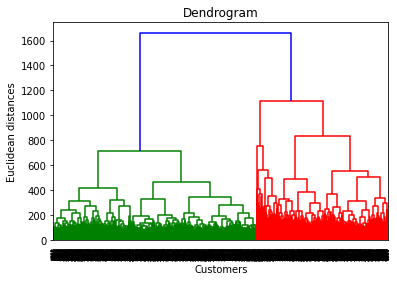

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)

In [135]:
y_hc

array([5, 3, 1, ..., 5, 0, 5])

In [29]:
import collections
collections.Counter(y_hc)

Counter({0: 261, 1: 592, 2: 788, 3: 1561, 4: 1, 5: 972})

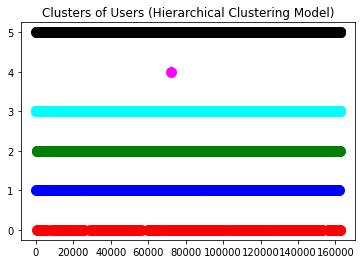

In [44]:
plt.scatter(xy[y_hc==0, 0], xy[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(xy[y_hc==1, 0], xy[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(xy[y_hc==2, 0], xy[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(xy[y_hc==3, 0], xy[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(xy[y_hc==4, 0], xy[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(xy[y_hc==5, 0], xy[y_hc==5, 1], s=100, c='black', label ='Cluster 6')
plt.title('Clusters of Users (Hierarchical Clustering Model)')
plt.show()

## **Cluster 1**

In [139]:
temp = xyz[xyz['Cluster'] == 0]
temp

,userId,Cluster
16,847,0
34,1748,0
45,1977,0
74,3150,0
92,3831,0
...,...,...
4106,159417,0
4116,159816,0
4131,160540,0
4163,162271,0


In [0]:
cluster_1 = pd.merge(ratings, temp, left_on = 'userId', right_on = 'userId')

In [0]:
cluster_1 = pd.merge(cluster_1, movies, on = 'movieId')

In [0]:
cluster_1.drop(columns = ['Cluster', 'timestamp', 'userId'], inplace = True)

In [0]:
cluster_1['genres'] = cluster_1['genres'].apply(lambda x: x.split('|'))

In [146]:
cluster_1

,movieId,rating,title,genres
0,1,4.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,4.5,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,1,4.5,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
3,1,3.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,1,4.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
...,...,...,...,...
616030,2895,2.5,Napoleon and Samantha (1972),"[Adventure, Drama]"
616031,6799,2.0,By the Sword (1991),[Drama]
616032,8792,2.0,Octane (2003),"[Horror, Thriller]"
616033,82452,3.5,Frozen (2007),[Drama]


In [149]:
cluster_1.drop_duplicates()

TypeError: ignored

In [137]:
cluster_1.movieId.nunique()

33566

In [138]:
cluster_1.userId.nunique()

261

In [0]:
import itertools
genres_1 = list(itertools.chain(*cluster_1.genres.tolist()))

In [0]:
myDictionary = collections.Counter(genres_1)

In [0]:
bars = list(myDictionary.keys())

In [0]:
height = list(myDictionary.values())

In [0]:
y_pos = np.arange(0, 100, 5).tolist()

In [103]:
y_pos

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [0]:
s1 = pd.Series(data = height, index = bars)

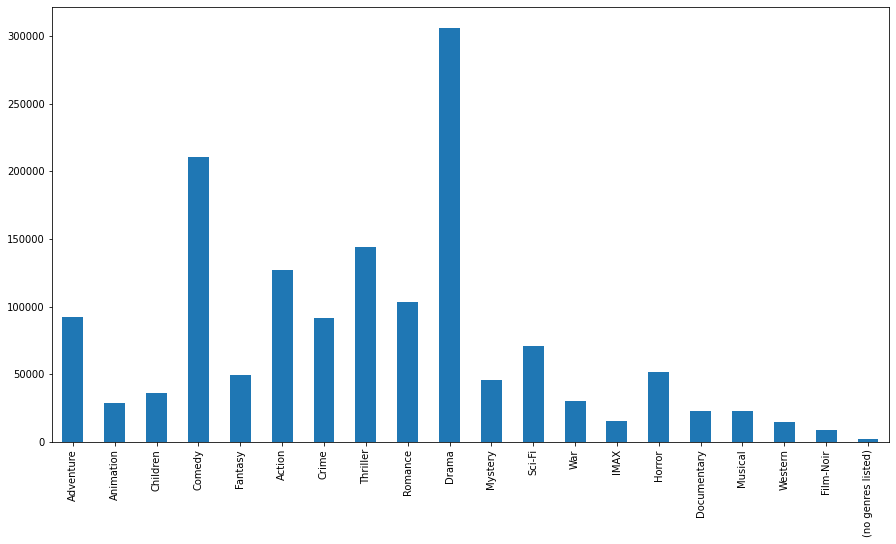

In [119]:
s1.plot.bar(figsize = (15, 8))

## **Cluster 2**

In [120]:
temp1 = xyz[xyz['Cluster'] == 1]
temp1

,userId,Cluster
2,187,1
20,939,1
37,1831,1
47,2054,1
48,2165,1
...,...,...
4138,160858,1
4143,161047,1
4149,161342,1
4152,161544,1


In [0]:
cluster_2 = pd.merge(ratings, temp1, left_on = 'userId', right_on = 'userId')

In [0]:
cluster_2 = pd.merge(cluster_2, movies, on = 'movieId')

In [0]:
cluster_2.drop(columns = ['Cluster', 'timestamp'], inplace = True)

In [0]:
cluster_2['genres']=cluster_2['genres'].apply(lambda x: x.split('|'))

In [0]:
import itertools
genres_2 = list(itertools.chain(*cluster_2.genres.tolist()))

In [0]:
myDictionary = collections.Counter(genres_2)

In [0]:
bars = list(myDictionary.keys())

In [0]:
height = list(myDictionary.values())

In [0]:
s1 = pd.Series(data = height, index = bars)

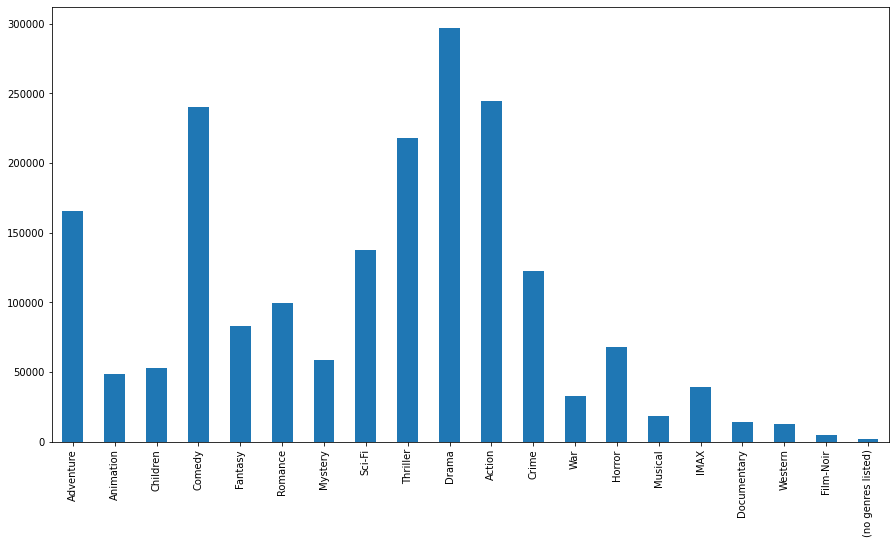

In [134]:
s1.plot.bar(figsize = (15, 8))

## ***MOVIE GENRE MATRIX***

In [0]:
genres = []
for i in movies.index:
    genres.extend(movies['genres'][i].split('|'))

In [0]:
genres = list(set(genres))
genres.remove('(no genres listed)')
len(genres)

19

In [0]:
movies_temp = movies.copy()

In [0]:
movies_temp = movies_temp.set_index('movieId')

In [0]:
movie_genre = pd.DataFrame(columns = genres, index = movie_ids)

In [0]:
movie_genre[genres] = 0.0

In [0]:
for i in movie_ids:
    for j in movies_temp['genres'][i].split('|'):
        try:
            movie_genre[j][i] = 1
        except KeyError:
            pass

In [0]:
movie_genre

,Sci-Fi,Western,Animation,Thriller,Adventure,Fantasy,Crime,Horror,War,Film-Noir,Comedy,Drama,Musical,IMAX,Documentary,Action,Mystery,Romance,Children
296,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1217,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1653,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4308,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
5952,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181023,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
144148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
190577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
206515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## ***Timestamp***

In [0]:
total.describe()['timestamp']['75%']

1454200478.0

In [0]:
test_75 = total[total['timestamp'] <= 1454200478.0]

In [0]:
test_25 = total[total['timestamp'] > 1454200478.0]

In [0]:
len(test_75['userId'].unique())

4106

In [0]:
len(test_25['userId'].unique())

4175

In [0]:
common = list(set(test_75['userId'].unique()).intersection(set(test_25['userId'].unique())))

In [0]:
common

[90115,
 3,
 16388,
 106507,
 24588,
 90128,
 98321,
 57362,
 19,
 106517,
 24598,
 49177,
 90137,
 147487,
 81957,
 114726,
 32808,
 81961,
 131116,
 131118,
 73775,
 32818,
 106548,
 106550,
 57399,
 139321,
 98363,
 16444,
 8253,
 73790,
 98364,
 139325,
 147521,
 65602,
 41027,
 49222,
 16456,
 81994,
 65611,
 41036,
 122960,
 16465,
 147539,
 16468,
 131156,
 106582,
 57432,
 122968,
 32861,
 90206,
 155742,
 57441,
 73826,
 41073,
 49266,
 24693,
 139385,
 90234,
 155771,
 98430,
 24706,
 155778,
 123019,
 57494,
 16535,
 114839,
 32922,
 57498,
 49314,
 155812,
 131237,
 155815,
 16552,
 32936,
 65707,
 139435,
 155822,
 73904,
 8369,
 131253,
 123061,
 73911,
 49338,
 187,
 73920,
 24772,
 32971,
 57548,
 90316,
 114894,
 155855,
 106706,
 114898,
 49364,
 65750,
 98524,
 65758,
 82142,
 106719,
 41185,
 139487,
 147679,
 73968,
 131312,
 8435,
 33013,
 65783,
 8442,
 49403,
 57595,
 123133,
 131324,
 24832,
 33026,
 98564,
 41223,
 147721,
 90380,
 98572,
 114958,
 131343,
 24

In [0]:
test_75 = test_75[test_75.userId.isin(common)]

In [0]:
test_25 = test_25[test_25.userId.isin(common)]

In [0]:
test_75

,userId,movieId,rating,timestamp,title,genres
0,3,296,5.0,1439474476,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
1,3,1217,5.0,1439474455,Ran (1985),"[Drama, War]"
2,3,1653,5.0,1439474631,Gattaca (1997),"[Drama, Sci-Fi, Thriller]"
3,3,4308,3.0,1439472792,Moulin Rouge (2001),"[Drama, Musical, Romance]"
4,3,5952,4.0,1439472616,"Lord of the Rings: The Two Towers, The (2002)","[Adventure, Fantasy]"
...,...,...,...,...,...,...
16063552,115410,101235,4.0,1453051369,"Great Gatsby, The (1949)",[Drama]
16063553,115410,140349,2.5,1453051430,Gabriel Iglesias: I'm Not Fat... I'm Fluffy (2...,[Comedy]
16063554,115410,133205,5.0,1453051977,Doug Stanhope: Beer Hall Putsch (2013),[Comedy]
16063555,115410,89584,3.0,1453051529,Skeletons (2010),"[Comedy, Fantasy]"


In [0]:
test75_groupby = pd.DataFrame(test_75.groupby(['userId', 'timestamp'])['movieId'].unique())

In [0]:
identify = pd.DataFrame(movie_genre.index.tolist())
identify = identify.rename(columns = {0 : 'movieId'})

In [0]:
identify[identify.index.isin([12404, 18238, 24501, 38769, 38770])].movieId.tolist()

[6237, 73416, 139614, 203823, 49739]

In [0]:
user_movie_pred2 = {}
for i in common:
    user_movie_pred2[i] = []

In [0]:
count_user = 1
for user in common:
    num = 5
    print(count_user)
    count_user += 1
    count = 0
    try:
      while len(user_movie_pred2[user]) != 15:
          movie_id = (test75_groupby.loc[user])[::-1].iloc[count]['movieId']
          for i in movie_id:
              array = (cosine_similarity(np.array(movie_genre.loc[i]).reshape(1, 19), movie_genre))[0].argsort()[-num:][::-1]
              user_movie_pred2[user].extend(identify[identify.index.isin(array.tolist())].movieId.tolist())
              if num > 1:
                  num -= 1
          user_movie_pred2[user] = list(set(user_movie_pred2[user]).difference(set(test_75[test_75['userId'] == user].movieId.tolist())))
          count += 1
    except IndexError:
      pass

In [0]:
for user in user_movie_pred2:
    match = set(user_movie_pred2[user]).intersection(set(test_25[test_25['userId'] == user].movieId.tolist()))
    if len(match) > 0:
      print(user)
      print(list(match), len(match))

3
[81834] 1
81957
[26603] 1
106550
[57368, 103883] 2
98363
[68358] 1
16465
[76093] 1
147539
[105504] 1
122968
[91535] 1
90234
[4370] 1
98430
[118696] 1
57494
[52722] 1
73911
[68358] 1
106706
[6709] 1
82142
[139644] 1
41185
[90249] 1
49403
[2328] 1
57595
[103042] 1
24832
[6564] 1
98564
[98243] 1
24859
[8361] 1
8476
[57368, 202799] 2
139567
[72605, 106487] 2
90441
[103042, 165667, 4978, 151695] 4
65939
[103883, 122886, 44191] 3
74130
[54736, 6537, 104841] 3
57813
[162356] 1
147935
[68358] 1
494
[104841] 1
41527
[6537] 1
98873
[96520, 139644, 150] 3
90691
[72167] 1
57925
[103042, 68358] 2
49735
[86880] 1
33404
[110134] 1
647
[68358] 1
148115
[49200] 1
90785
[190339, 168612, 133988, 149830, 185031, 81834, 192307, 173145] 8
41657
[6537] 1
156346
[6541] 1
66244
[101025] 1
123590
[110553, 102445] 2
49867
[595] 1
41686
[118696, 60760, 4006] 3
8932
[4370] 1
66315
[81229, 72167] 2
82730
[111759] 1
99117
[118696, 98809, 8368] 3
156480
[86880, 103042, 104841, 81834, 95510] 5
148294
[1566] 1
33610


In [0]:
count = 0
for i in user_movie_pred2:
  if len(user_movie_pred2[i]) > 0:
    count += 1
print(count)

4106
